<a href="https://colab.research.google.com/github/armand010/PCVK_Ganjil_2024/blob/main/PCVK_Week_9_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Library

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png)


In [8]:
morphologyImg = cv2.imread('/content/drive/MyDrive/PCVK/morphology.png')

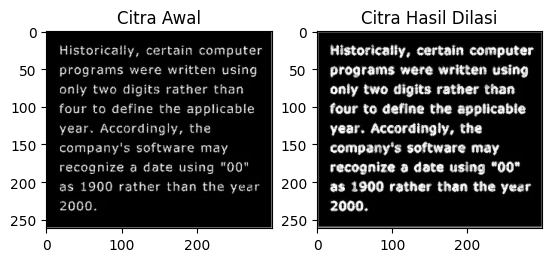

In [10]:
# Gambar yang digunakan
morpImg = morphologyImg.copy()

# Kernel manual
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]], dtype=np.uint8)


# Fungsi dilasi gambar
dilated = cv2.dilate(morpImg, kernel, iterations=1)

# Menampilkan hasil
plt.subplot(121)
plt.title('Citra Awal')
plt.imshow(morpImg)

plt.subplot(122)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated)

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
morphology.png, dan cetak Structuring Element-nya)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


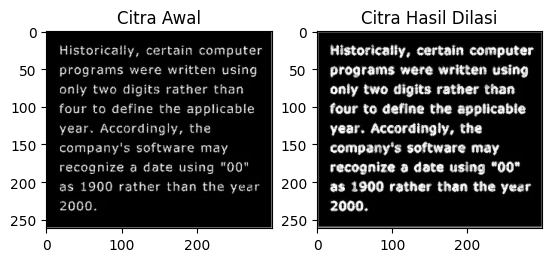

In [12]:
# Gambar yang digunakan
morpImg = morphologyImg.copy()

# Kernel dengan Structuing Element
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

# Fungsi dilasi gambar
dilated = cv2.dilate(morpImg, kernel, iterations=1)

# Cetak SED
print(kernel)

# Menampilkan hasil
plt.subplot(121)
plt.title('Citra Awal')
plt.imshow(morpImg)

plt.subplot(122)
plt.title('Citra Hasil Dilasi')
plt.imshow(dilated)

5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
j.png)

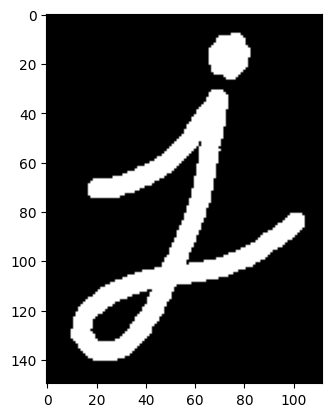

In [5]:
jImg = cv2.imread('/content/drive/MyDrive/PCVK/j.png')

plt.imshow(jImg)

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)


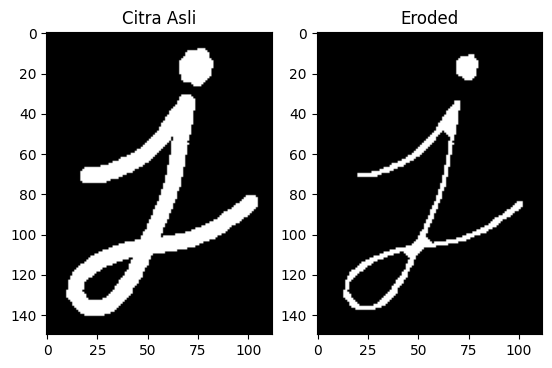

In [6]:
jImg = cv2.imread('/content/drive/MyDrive/PCVK/j.png')

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

eroded_image = cv2.erode(jImg, kernel, iterations=3)

plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(jImg)

plt.subplot(122)
plt.title('Eroded')
plt.imshow(eroded_image)

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)


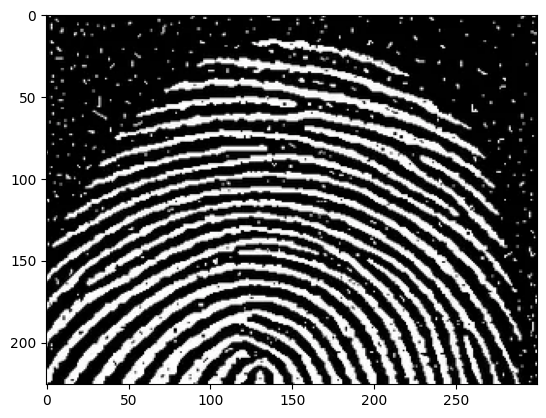

In [ ]:
fingerImg = cv2.imread('/content/drive/MyDrive/PCVK/fingerprint.png')

plt.imshow(fingerImg)

8.  Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
fingerprint.png)

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
(Gunakan gambar j.png)

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)